
(50000, 28, 28)
Dữ liệu y ban đầu:  5
Dữ liệu y sau one-hot encoding:  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]



Epoch 1/10


1563/1563 [==============================] - 19s 11ms/step - loss: 0.2895 - accuracy: 0.9144 - val_loss: 0.0737 - val_accuracy: 0.9802
Epoch 2/10
1563/1563 [==============================] - 18s 12ms/step - loss: 0.0603 - accuracy: 0.9821 - val_loss: 0.0569 - val_accuracy: 0.9844
Epoch 3/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.0384 - accuracy: 0.9890 - val_loss: 0.0444 - val_accuracy: 0.9880
Epoch 4/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.0258 - accuracy: 0.9925 - val_loss: 0.0453 - val_accuracy: 0.9870
Epoch 5/10
1563/1563 [==============================] - 23s 15ms/step - loss: 0.0171 - accuracy: 0.9953 - val_loss: 0.0410 - val_accuracy: 0.9878
Epoch 6/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.0123 - accuracy: 0.9969 - val_loss: 0.0446 - val_accuracy: 0.9873
Epoch 7/10
1563

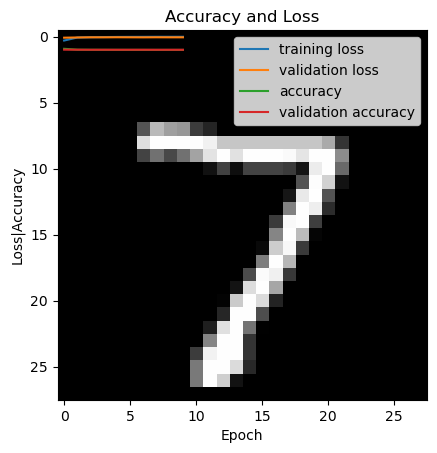

In [1]:
# 1. Thêm thư viện
import numpy as np 
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from keras.datasets import mnist

# 2. Load dữ liệu MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_val, y_val = X_train[50000:60000,:], y_train[50000:60000]
X_train, y_train = X_train[:50000,:], y_train[:50000]
print(X_train.shape)

# 3. Reshape lại dữ liệu cho đúng kích thước mà keras yêu cầu
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# 4. One hot encoding label (Y)
Y_train = to_categorical(y_train, 10)
Y_val = to_categorical(y_val, 10)
Y_test = to_categorical(y_test, 10)
print('Dữ liệu y ban đầu: ', y_train[0])
print('Dữ liệu y sau one-hot encoding: ', Y_train[0])

# 5. Định nghĩa model
model = Sequential()

# Thêm Convolutional layer với 32 kernel, kích thước kernel 3*3
# dùng hàm sigmoid làm activation và chỉ rõ input_shape cho layer đầu tiên
model.add(Conv2D(32, (3, 3), activation='sigmoid', input_shape=(28,28,1)))

# Thêm Convolutional layer
model.add(Conv2D(32, (3, 3), activation='sigmoid'))

# Thêm Max pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten layer chuyển từ tensor sang vector
model.add(Flatten())

# Thêm Fully Connected layer với 128 nodes và dùng hàm sigmoid
model.add(Dense(128, activation='sigmoid'))

# Output layer với 10 node và dùng softmax function để chuyển sang xác suất
model.add(Dense(10, activation='softmax'))

# 6. Compile model, chỉ rõ hàm loss_function nào được sử dụng, phương thức dùng để tối ưu hàm loss_funsction
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 7. Thực hiện train model với data
H = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), batch_size=32, epochs=10, verbose=1)

# 8. Vẽ đồ thị loss, accuracy của training set và validation set
fig = plt.figure()
numOfEpoch = 10
plt.plot(np.arange(0, numOfEpoch), H.history['loss'], label='training loss')
plt.plot(np.arange(0, numOfEpoch), H.history['val_loss'], label='validation loss')
plt.plot(np.arange(0, numOfEpoch), H.history['accuracy'], label='accuracy')
plt.plot(np.arange(0, numOfEpoch), H.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss|Accuracy')
plt.legend()

# 9. Đánh giá model với dữ liệu test set
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

# 10. Dự đoán ảnh
plt.imshow(X_test[0].reshape(28,28), cmap='gray')

y_predict = model.predict(X_test[0].reshape(1,28,28,1))
print('Giá trị dự đoán: ', np.argmax(y_predict))